## Linear Regression Project
We have contract work with Ecommerce company that sells clothing online as well as in-store style and clothing advice sessions. Customers can come into the store have sessions/meetings with a personal stylist, then can go home and order either or on a mobile app or a website for the clothes they want.

We want to decide whether to focus efforts on either mobile app or the website.

We can decide more clearly by analyzing the customer data below.

Note: This a project from Jose Portilla's Python for Data Science and Machine Learning Udemy Course

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in the E-commerce customers csv file as a DataFrame

In [42]:
customers = pd.read_csv('Ecommerce Customers')

In [43]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [44]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [45]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Use seaborn to create a jointplot to compare Time on Website and Yearly Amount Spent columns.

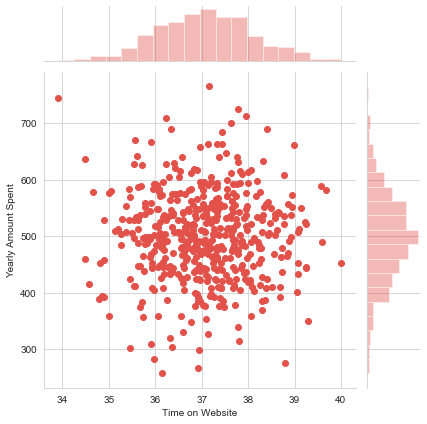

In [46]:
sns.set_palette("Spectral")
sns.set_style("whitegrid")
sns.jointplot(data=customers, x="Time on Website", y="Yearly Amount Spent")

The more time spend on website means more money spent. The jointplot agrees with this.

Next do the same thing but with time on app instead

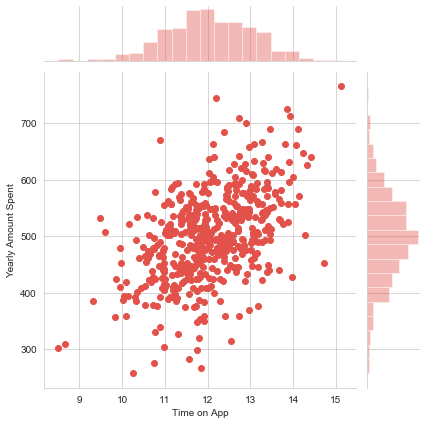

In [47]:
sns.jointplot(data=customers, x="Time on App", y="Yearly Amount Spent")

Again more time spent on app means more money spent.

Next use jointplot creates a 2D hexbin comparing time on app vs length of membership.

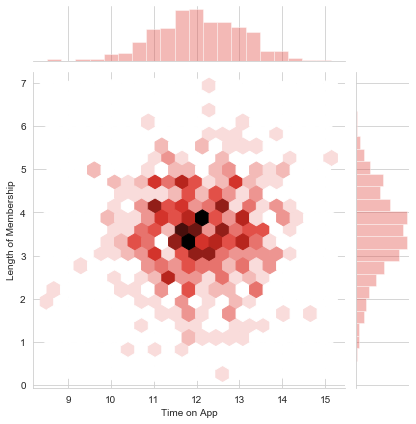

In [48]:
sns.jointplot(data=customers, x="Time on App", y="Length of Membership", kind="hex")

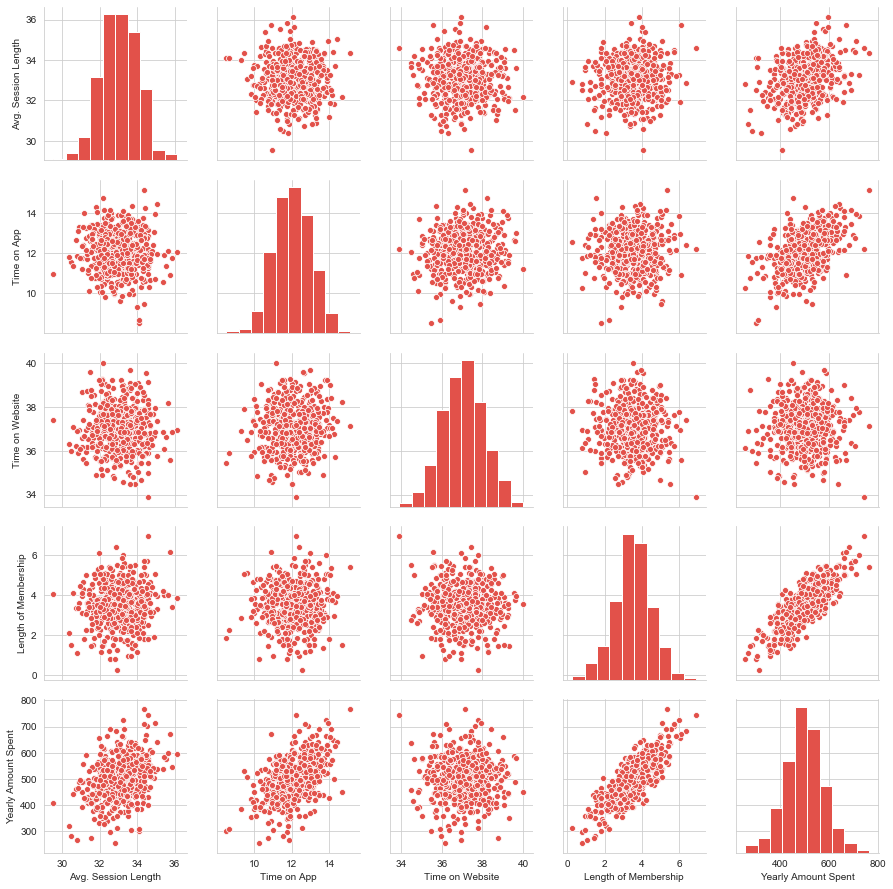

In [49]:
sns.pairplot(customers)

Based on the pairplot the most correlated feature with Yearly Amount Spent is the Length of Membership.

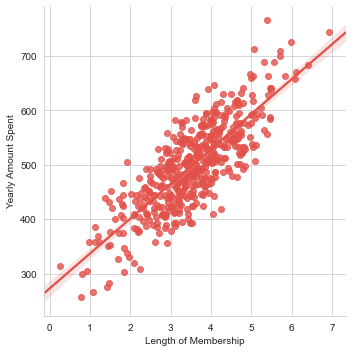

In [50]:
sns.lmplot(data=customers,x="Length of Membership",y="Yearly Amount Spent")

## Training and Testing Data
We have now explored the data a bit. Let's split the data into training and testing sets. We will set variable X equal to the numerical features of the customers and variable y equal to "Yearly Amount Spent."

In [51]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [52]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']          

We can now use model_selection.train_test_split from sklearn to split data into training and testing sets.

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Training The Model

Now we can train our model on our training data

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can now print out the coefficients of the model and how we can interpret them.

In [70]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.69154034 37.89259966  0.56058149 61.64859402]


## Predicting Test Data
Now we have fit our model, we can evaluate how well it did by comparing it to the test values

In [74]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

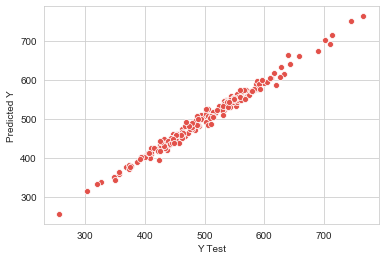

In [79]:
sns.scatterplot(x=y_test,y=predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")

## Evaluating the Model
We can evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2)

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [80]:
from sklearn import metrics

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.7426712858387505
MSE: 93.83297800820091
RMSE: 9.686742383701597


The model produces a very good fit with our test data. Let's quickly analyze the residuals to make sure was okay with our data.

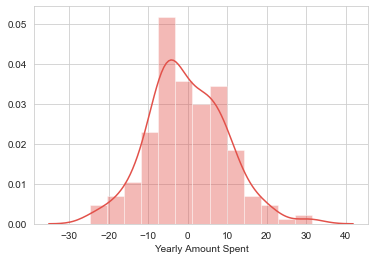

In [83]:
sns.distplot((y_test-predictions))

It results in a histogram that looks pretty nomarly distributed.

## Conclusion
Now we can figure out our answer to the original question. Should the company focus their efforts on mobile apps or web development? Perhaps it doesn't matter and that membership time and length is the most important. We can interpret the coeffecients and get an idea.

In [84]:
lm.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [89]:
df = pd.DataFrame(lm.coef_,columns=['Coeffecient'],
                 index=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'])
df

,Coeffecient
Avg. Session Length,25.691540
Time on App,37.892600
Time on Website,0.560581
Length of Membership,61.648594


These coefficients tell a whole lot about the correlation between the respective index and the "Yearly Amount Spent."

From these coefficients it's clear to see that the biggest corellation to "Yearly Amount Spent" is the length of the membership. However coming in second is the amount of time they spend on the app. 

To summarize, if you hold all other features fixed:

- A unit 1 increase in **Avg. Session Length** is associated with an **increase of 25.69 dollars spent**
- A unit 1 increase in **Time on App** is associated with an **increase of 37.89 dollars spent**
- A unit 1 increase in **Time on Website** is associated with an **increase of 0.56 dollars spent**
- A unit 1 increase in **Length of Membership** is associated with an **increase of 61.65 dollars spent**

#### In conclusion:

There are two different ways to think about this issue
- 1. Develop the website so that it catches up to the performance of the mobile app
- 2. Develop the app as it brings in more money

To answer the question it depends on other factors in the company and what the company's vision is.